# Problem Statement

##### The goal of this project is to identify health insurance policyholders who may be interested in purchasing vehicle insurance, using a dataset containing around 5,00,000 samples and various demographic and vehicle-related attributes.

Cross-selling identifies products or services that satisfy additional, complementary needs that are unfulfilled by the original product that a customer possesses. Cross-selling is prevalent in various domains and industries including banks. For example, credit cards are cross-sold to people registering a savings account.

## Flowchart

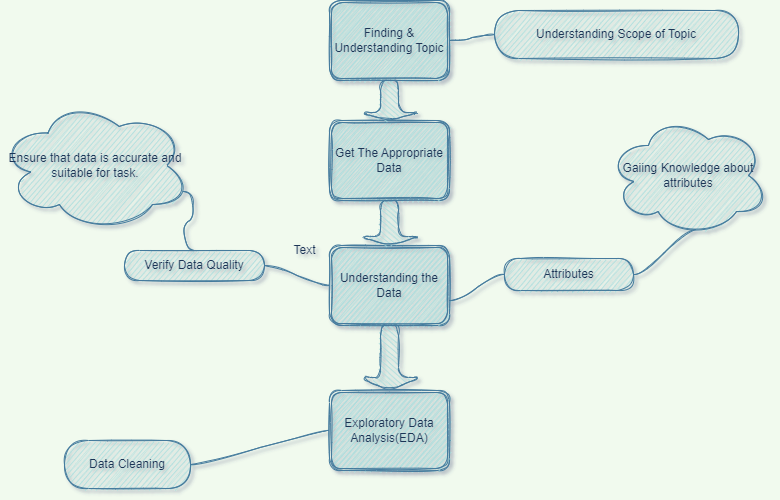

## Importing Required Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Preliminary Data Processing

In [ ]:
df = pd.read_csv("data/uncleaned_data.csv")
df.head()

## Column Descriptions

- __Id__: Unique ID for the customer.
- __Gender__: Gender of the customer.
- __Age__: Age of the customer.
- __Driving License__: No if customer does not have DL, Yes if customer already has DL.
- __Region Code__: Unique code for the region of the customer.
- __Previously Insured__: Yes if customer already has vehicle insurance, No if customer doesn't have vehicle insurance.
- __Vehicle Age__: Age of the vehicle.
- __Vehicle Damage__: Yes if customer got his vehicle damaged in the past, No if customer didn't get his vehicle damaged in the past.
- __Anual Premium__: The amount customer needs to pay as premium in the year.
- __Policy sales channel__: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- __Vintage__: Number of Days, customer has been associated with the company.
- __Response__: 1 if customer is interested, 0 if customer is not interested.

## Data dimensions

In [ ]:
df.shape

Number of rows = 508146              
Number of column = 12

### Dropping 'id' column

In [ ]:
del df['id']
df.tail()

## Structure of data

In [ ]:
df.info()

# Exploratory data analysis (EDA)

## Descriptive Statistics

### Numerical Attributes

In [ ]:
df.describe().T

- The age mean is 39 years and the maximum value is 85 years. The variation is higher than 0.40. The skew is right skewed and kurtosis isn't 0, therefore the distribution isn't normal.
- The region code is not a normal distribution because it has got negative skew and kurtosis. The min code is 0 and it may be a invalid code. The variation is higher because it's 0.50.
- It has a higher negative skew and kurtosis!
- The range is 537,535, so there's a great difference in some users to pay.
- The maximum number of days to be with the company is 299 days and 10 days is the minimum. The skew is almost 0.0000, however the variation coeficient is greater than 0.50 and kurstosis is negative.

### Categorical Attributes

In [ ]:
df.describe(include='object').T

- There's only two types of gender and the top is male.
- The most common 'No', in other words, the most people in this database don't have vehicle insurance.
- The top value for driving_license is 'yes'. However, there are some people which doesn't have driving license.
- The vehicle age most common is 1-2 years.
- There are more accident vehicles than those that do not have an accident history.

## Check NA values

In [ ]:
df.isna().sum()

In [ ]:
import missingno as msno
msno.matrix(df)

## Removing rows having max NA values

In [ ]:
# Remove rows that have the maximum number of missing values
df.dropna(thresh=9, inplace=True)

In [ ]:
# df.dropna(subset=["Driving_License", "Region_Code", "Vehicle_Age"], inplace=True)

In [ ]:
df.shape

Total of 109 rows where deleted which contained maximum number of NA values

## Fill Out NA

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df['Annual_Premium'])

plt.show()

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df['Vintage'])
plt.show()

In [ ]:
df.corr(method="spearman")

Annual_Premium and Vintage column doesn't have good correlation with rest of the coloumns, because of this reason a model cannot be used to predict the NA values in the dataset.

It is ok to use mean/median/mode if missing data is less than 3%, otherwise introduces too much bias and artificially lowers variability of data.

- __Mean__-It is preferred if data is numeric and not skewed.
- __Median__-It is preferred if data is numeric and skewed.
- __Mode__-It is preferred if the data is a string(object) or numeric.

In [ ]:
Annual_premium_median = df['Annual_Premium'].median()
Annual_premium_median

In [ ]:
vintage_mean = round(df['Vintage'].mean(), 2)
vintage_mean

In [ ]:
df['Annual_Premium'].fillna(Annual_premium_median, inplace=True)
df['Vintage'].fillna(vintage_mean, inplace=True)

In [ ]:
df.isna().sum()

## Hypothesis Selection 
Hypothesis Testing is the first step we take towards understanding the data. Hypothesis Testing gives us the head-start towards understanding the problem.

- __Gender:__ Males are more likely to buy Vehicle Insurance.
- __Age:__ Young people account for less than 30% of custumers who want insurance.
- __Driving_License:__ Customers who generally have Driving License take Insurance.
- __Vechile_Age:__ 60% or more of the customers with two-year-old cars are more likely to buy insurace.
- __Vechile_Damage:__ Less than 40% of customers who have damaged the vehicle don't want to get the vechile insurance.
- __Annual_Premium:__ Customers generally opt for Insurance where Premium is not too high.
- __Policy_Sales_Channel:__ The more time associated, customers are more likely to buy insurance.
- __Vintage:__ Older customers are more likely to buy insurance.

## Univariate Analysis

In [ ]:
ax = sns.countplot(y='Response', data=df)

total = df['Response'].size
for p in ax.patches:
    
        # Calculate the percentage of responses for each bar
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        
        # Add the percentage label to the bar
        x = p.get_x() + p.get_width() - 3000
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Response count')

### Numerical Variables

In [ ]:
df.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.show()

In [ ]:
aux1 = df.select_dtypes(exclude='object')
columns = aux1.columns.tolist()
j = 1

for column in columns:
    plt.subplot(2, 4, j)
    sns.boxplot(aux1[column]);
    
    j += 1

### Categorical Variables

In [ ]:
# Create a figure with 3 rows and 2 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Add a bar chart for the Response variable to the first subplot
# sns.countplot(x='Response', data=df, ax=ax[0][0])

# Add a bar chart for the Gender` variable to the second subplot
sns.countplot(x='Gender', data=df, ax=ax[0][0])

# Add a bar chart for the Driving_License variable to the third subplot
# sns.countplot(x='Driving_License', data=df, ax=ax[1][0])

# Add a bar chart for the Previously_Insured variable to the fourth subplot
sns.countplot(x='Previously_Insured', data=df, ax=ax[1][0])

# Add a bar chart for the Vehicle_Damage variable to the fifth subplot
sns.countplot(x='Vehicle_Damage', data=df, ax=ax[0][1])

# Add a bar chart for the Vehicle_Age variable to the sixth subplot
sns.countplot(x='Vehicle_Age', data=df, ax=ax[1][1])

# Show the figure
plt.show()

We can see that our dataset is heavily imbalanced in the target field. With most of the values in class 0

A balanced Gender field

2.## Certainly, most of our customers must have driving license in order to drive a car. Few of our customers don have DL, maybe because they're underage, waiting to be egliable for a DL.

A balanced Previously_insured field, slightly larger portion of our customers don't have vehicle insurance before. They can be our potential clients

Most of our clients own new cars (<2 years of Vehicle Age). So our further findings will mostly reflect for customers who own new cars, it may not be true for old car (> 2 years)

## Bivariate Analysis

In [ ]:
aux1 = df[df['Response'] == 1]
ax = sns.countplot(y='Gender', data=aux1)

total = aux1['Gender'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Response according to Gender')

In [ ]:
df['Age'].describe()

In [ ]:
df.loc[(df['Age']>=3) & (df['Age']<18),'Age_label']='Youth' ## Young ppl
df.loc[(df['Age']>=18) & (df['Age']<29),'Age_label']='Youth' ## Young ppl
df.loc[(df['Age']>=29) & (df['Age']<55),'Age_label']='Adult' ## Mid-Age Ppl
df.loc[(df['Age']>=55) & (df['Age']<=85),'Age_label']='Old Age' ## Old Age

In [ ]:
aux1 = df[df['Response'] == 1]
ax = sns.countplot(y='Age_label', data=aux1)

total = aux1['Age_label'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Response according to Age')

In [ ]:
# Using seaborn's kdeplot function to plot the Age column of the DataFrame with hue(color) set to the Response column
sns.kdeplot(x='Age', data=df, hue='Response', multiple="stack");
plt.title("Age by Response")

In [ ]:
aux1 = df[df['Response'] == 1]
ax = sns.countplot(y='Previously_Insured', data=aux1);

total = aux1['Previously_Insured'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title("Response According to Previously Insured")

In [ ]:
aux1 = df[df['Response'] == 1]
ax = sns.countplot(y='Vehicle_Age', data=aux1);

total = aux1['Vehicle_Age'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    
plt.title("Response According to Vechile Age")

In [ ]:
aux1 = df[df['Response'] == 0]
ax = sns.countplot(y='Vehicle_Damage', data=aux1);

total = aux1['Vehicle_Damage'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    
plt.title("Response According to Vechile damage")

In [ ]:
plt.subplot(2, 1, 1)
sns.scatterplot(x='Age', y='Annual_Premium', data=df, hue='Response')

plt.subplot(2, 1, 2)
sns.lineplot(x='Age', y='Annual_Premium', data=df, hue='Response');

In [ ]:
plt.subplot(1, 2, 2)
sns.kdeplot(x='Vintage', data=df, hue='Response', multiple="stack");

In [ ]:
plt.figure(figsize=(40,10))
df['Policy_Sales_Channel'].value_counts().plot.bar()

### Saving data

In [ ]:
df.to_csv('data/cleaned_data.csv')

# Feature Engineering

## Loading data

In [7]:
df2 = pd.read_csv('data/cleaned_data.csv')

## Data cleaning

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508037 entries, 0 to 508036
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                508037 non-null  object 
 1   Age                   508037 non-null  int64  
 2   Driving_License       508037 non-null  object 
 3   Region_Code           508037 non-null  int64  
 4   Previously_Insured    508037 non-null  object 
 5   Vehicle_Age           508037 non-null  object 
 6   Vehicle_Damage        508037 non-null  object 
 7   Annual_Premium        508037 non-null  int64  
 8   Policy_Sales_Channel  508037 non-null  int64  
 9   Vintage               508037 non-null  float64
 10  Response              508037 non-null  int64  
 11  Age_label             508037 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 46.5+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder

def get_encoding(df2, col):
  encoder = LabelEncoder()
  df2[col] = encoder.fit_transform(df2[col])

  labels = {encoded: original for encoded, original in enumerate(encoder.classes_)}
  print(labels)

In [10]:
get_encoding(df2, 'Gender')

{0: 'Female', 1: 'Male'}


In [11]:
get_encoding(df2, 'Driving_License')

{0: 'No', 1: 'Yes'}


In [12]:
get_encoding(df2, 'Previously_Insured')

{0: 'No', 1: 'Yes'}


In [13]:
get_encoding(df2, 'Vehicle_Age')

{0: '1-2 Year', 1: '< 1 Year', 2: '> 2 Years'}


In [14]:
get_encoding(df2, 'Vehicle_Damage')

{0: 'No', 1: 'Yes'}


In [15]:
df2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_label
0,1,44,1,28,0,2,1,40454,26,217.0,1,Adult
1,1,76,1,3,0,0,0,33536,26,183.0,0,Old Age
2,1,47,1,28,0,2,1,38294,26,27.0,1,Adult
3,1,21,1,11,1,1,0,28619,152,203.0,0,Youth
4,0,29,1,41,1,1,0,27496,152,39.0,0,Adult


## Creating New Feature

In [16]:
new_column = df2.apply(lambda row: 1 if row["Vehicle_Age"] == 0 and row["Vehicle_Damage"] == 1 else 0, axis=1)

# Insert the new column into the second-last position
df2.insert(len(df2.columns)-2, "vehicle_age_x_damage", new_column)

- If a customer's vehicle age is less than one year and their vehicle has previously been damaged, the new feature takes on a value of 1. If not, the value is 0.
- This feature __may be__ useful in predicting whether a customer is interested in buying a car insurance policy based on their vehicle's age and prior damage history.

Text(0.5, 1.0, 'Correlation HeatMap')

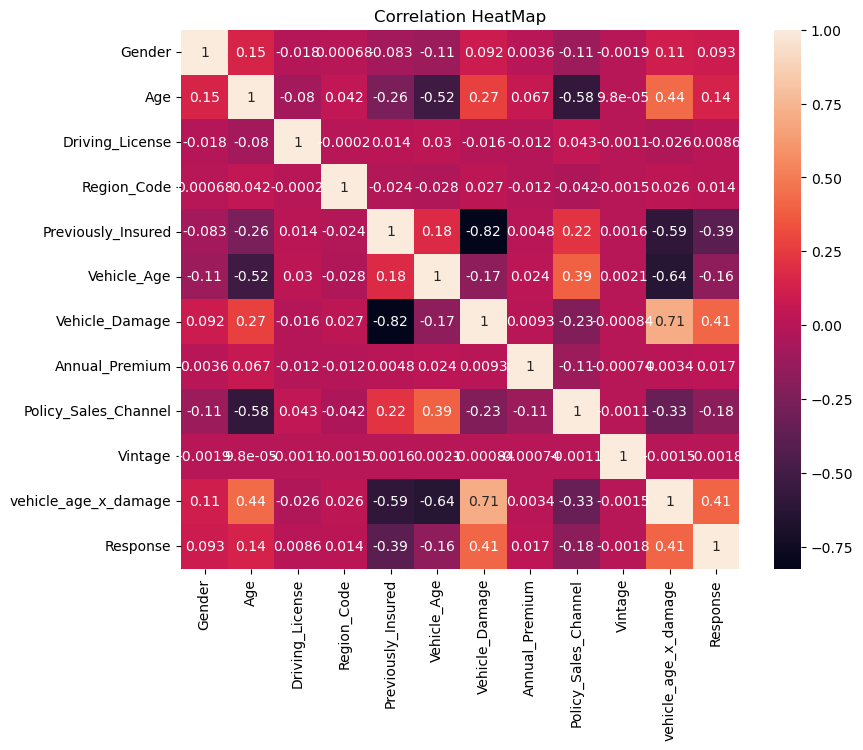

In [17]:
plt.figure(figsize=(9,7))
sns.heatmap(df2.corr(),annot=True)
plt.title('Correlation HeatMap')

- "Vehicle_Damage" and "Previously_Insured" columns have a strong correlation of -0.82 between them.
- Linear models may be affected by this multicollinearity, but non-parametric models, such as tree-based models, may not be as affected.
- We will check the impact of these columns on the model during the model building process.

## Separating features variables and target variable.

In [18]:
X = df2.drop(columns=['Response', 'Age_label', 'vehicle_age_x_damage'], axis=1)
X = X.values
y = df2['Response']

## Balancing Dataset

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(X, y)

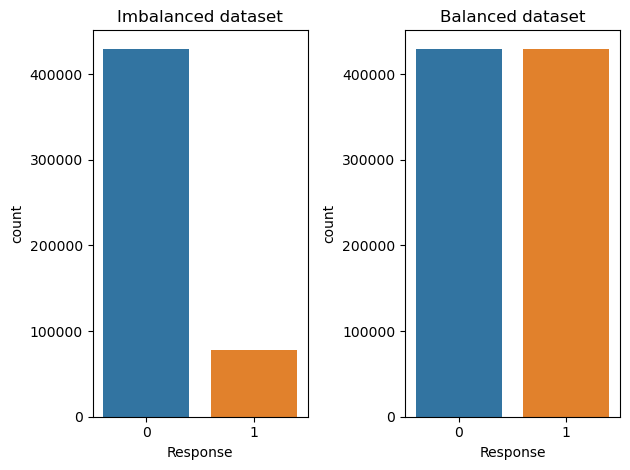

In [20]:
plt.subplot(121)
sns.countplot(y)
plt.title('Imbalanced dataset')

plt.subplot(122)
sns.countplot(y_balanced)
plt.title('Balanced dataset')

plt.tight_layout()
plt.show()

### Spliting into Train and Test

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25, random_state=7)

### Scaling data

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

## Model Building

#### Importing Required Packages

In [23]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

#### Logistic Regression

In [ ]:
# Define and train the logistic regression model with cross-validation
lr_model = LogisticRegressionCV(solver="liblinear", cv=5, random_state=7)
lr_model.fit(x_train, y_train)

In [ ]:
# Generate the classification report using the testing set
y_pred = lr_model.predict(x_test)
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)

In [ ]:
# Calculate predicted probabilities and AUC-ROC score using the testing set
y_pred_proba = lr_model.predict_proba(x_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC score:", auc_roc)

In [ ]:
# Plot the AUC-ROC curve using the testing set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()


#### Naive Bayes

In [26]:
# Initialize the model
nb_model = GaussianNB()

# Train the model on the training set
nb_model.fit(x_train, y_train)

GaussianNB()

In [27]:
# Generate the classification report using the testing set
y_pred = nb_model.predict(x_test)
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79    107325
           1       0.76      0.92      0.83    107577

    accuracy                           0.81    214902
   macro avg       0.83      0.81      0.81    214902
weighted avg       0.83      0.81      0.81    214902



In [28]:
# Calculate predicted probabilities and AUC-ROC score using the testing set
y_pred_proba = nb_model.predict_proba(x_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.8683041968296509


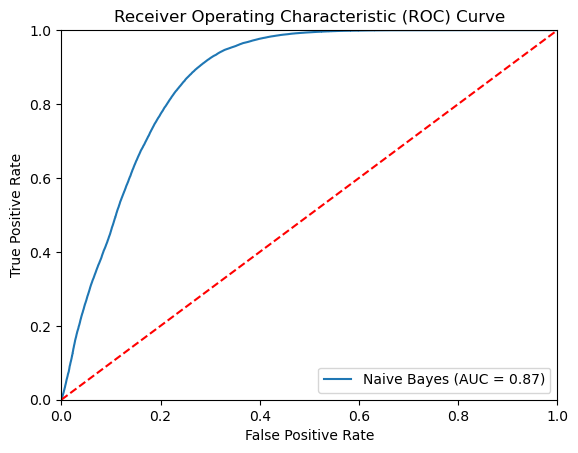

In [29]:
# Plot the AUC-ROC curve using the testing set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Naive Bayes (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### K-Nearest Neighbors

In [24]:
# Initialize the model with n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

# Train the model on the training set
knn.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(x_test)

In [25]:
# Generate the classification report and confusion matrix using the testing set
class_report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80    107325
           1       0.76      0.95      0.84    107577

    accuracy                           0.82    214902
   macro avg       0.85      0.82      0.82    214902
weighted avg       0.85      0.82      0.82    214902



#### Decision Tree

_Applying GridSearch_

In [ ]:
param_grid = {
    'min_samples_split': [2, 3, 4, 5, 6, 7],
    'max_depth': [3, 4, 5, 6, 7, 9, 11],
    'criterion': ['entropy', 'gini']
}

In [ ]:
gridDecisionTree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid, cv = 5)

In [ ]:
gridDecisionTree.fit(x_train, y_train)

In [ ]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Depth: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

_Building decision tree with above parameters_

In [30]:
d_model = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 7, max_depth= 11, random_state=7)

In [31]:
d_model.fit(x_train, y_train)
y_pred = d_model.predict(x_test)

In [32]:
# Generate the classification report and confusion matrix using the testing set
class_report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87    107325
           1       0.84      0.93      0.88    107577

    accuracy                           0.88    214902
   macro avg       0.88      0.88      0.88    214902
weighted avg       0.88      0.88      0.88    214902



In [33]:
# Calculate predicted probabilities and AUC-ROC score using the testing set
y_pred_proba = d_model.predict_proba(x_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.9516942794431021


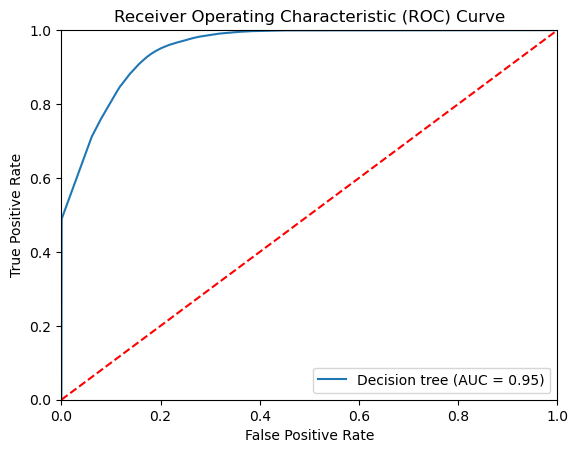

In [34]:
# Plot the AUC-ROC curve using the testing set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Decision tree (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Random Forrest

_Applying GridSearch_

In [ ]:
param_grid = {
    'n_estimators': [100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4]
}

In [ ]:
rf = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

_Building Random Forrest Tree_

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

In [ ]:
param = rf_model.get_params()
print("Best parameters:", param)

In [ ]:
# Generate the classification report and confusion matrix using the testing set
class_report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print("Classification report:\n", class_report)

In [ ]:
# Calculate predicted probabilities and AUC-ROC score using the testing set
y_pred_proba = rf_model.predict_proba(x_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC score:", auc_roc)

In [ ]:
# Plot the AUC-ROC curve using the testing set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Random forrest (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### XGBOOST Model

In [20]:
# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [21]:
# Generate the classification report
y_pred = xgb_model.predict(x_test)
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91    107325
           1       0.91      0.90      0.91    107577

    accuracy                           0.91    214902
   macro avg       0.91      0.91      0.91    214902
weighted avg       0.91      0.91      0.91    214902



In [22]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

Confusion matrix:
 [[98211  9114]
 [10482 97095]]


In [23]:
# Calculate predicted probabilities and AUC-ROC score
y_pred_proba = xgb_model.predict_proba(x_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.9794785866855329


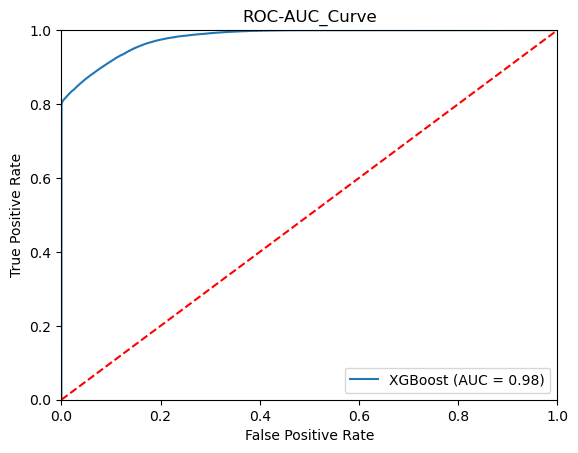

In [24]:
# Plot the AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC_Curve')
plt.legend(loc="lower right")
plt.show()

#### Finding most important features

In [30]:
columns = df2.drop(columns=['Response', 'Age_label', 'vehicle_age_x_damage'], axis=1).columns
columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [26]:
feature_imp_random = pd.Series(xgb_model.feature_importances_, index = columns).sort_values(ascending = False)

In [27]:
feature_imp_random

Vehicle_Damage          0.733893
Previously_Insured      0.115961
Gender                  0.068534
Vehicle_Age             0.035336
Age                     0.016921
Policy_Sales_Channel    0.009294
Region_Code             0.009129
Driving_License         0.007764
Annual_Premium          0.001687
Vintage                 0.001481
dtype: float32

__Conclusion:__ 
- From all the models trained RandomForrest and XGBoost has performed best with an accuracy score of 91%.
- We will use XGBoost for prediction purpose and export it using pickle.

### Exporting Model Using Pickle

In [28]:
import pickle

In [29]:
pickle.dump(xgb_model, open('model/xgb_model.pkl','wb'))

In [31]:
df2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,vehicle_age_x_damage,Response,Age_label
0,1,44,1,28,0,2,1,40454,26,217.0,0,1,Adult
1,1,76,1,3,0,0,0,33536,26,183.0,0,0,Old Age
2,1,47,1,28,0,2,1,38294,26,27.0,0,1,Adult
3,1,21,1,11,1,1,0,28619,152,203.0,0,0,Youth
4,0,29,1,41,1,1,0,27496,152,39.0,0,0,Adult


In [44]:
#Loading model to compare the results
model = pickle.load(open('model/xgb_model.pkl','rb'))
print(model.predict([[0, 44, 1, 28, 0, 2, 1, 40454, 26, 241]]))

[1]
